<a href="https://colab.research.google.com/github/Baldezo313/Artificial-Neural-Networks/blob/main/code/ANN_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#How to install libraries that are not pre-installed on Colab
!pip install patchify
!pip install tensorflow-gpu

In [ ]:
#Import needed libraries
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Check if GPU is used
my_gpu_device_name = tf.test.gpu_device_name()

if my_gpu_device_name != '/device:GPU:0':
  raise SystemError('GPU not found!')

print(f'Available GPU : {my_gpu_device_name}')

Available GPU : /device:GPU:0


In [ ]:
#Check which GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)

if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Mar 12 09:22:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    37W / 300W |    471MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Check how much memory is still available
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
print(tf.__version__)   #show the version of TensorFlow we are using

2.8.0


In [ ]:
#Load the MNIST dataset
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


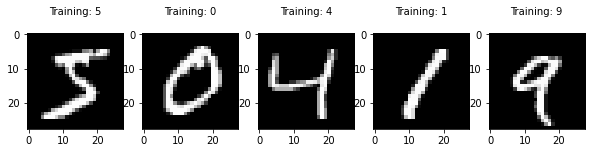

In [ ]:

#Visualise a few examples
plt.figure(figsize=(10, 2))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    #print(np.shape(image))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 10)

In [ ]:
#Convert data from integers to floating-point numbers (between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#Build the tf.keras.Sequential model by adding a layer after another
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#Compile the model : add optimizer, loss, and performance evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #'sparse_categorical_crossentropy' used when the true labels are integers
              #and 'categorical_crossentropy' is used when the true labels are one-hot encoded
              metrics=['accuracy'])

In [ ]:
print(np.shape(x_train))
print(np.shape(x_test))

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#Train
model.fit(x_train, y_train, epochs=20)  #default batch_size = 32

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2581 - accuracy: 0.9257
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9675
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9772
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0570 - accuracy: 0.9821
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0434 - accuracy: 0.9864
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [ ]:
#Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print("loss = {}, accuracy = {}".format(loss, accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9788
loss = 0.1020134761929512, accuracy = 0.9787999987602234


In [ ]:
from sklearn import metrics
predictions = model.predict(x_test)  #gives the probabilities of belonging of this image to the classes
print(predictions)

In [ ]:
#To get the classes:
classes = np.argmax(predictions, axis = 1)  #finds the index of the highest value in each row, axis=1 means that the operation is across rows
print(classes)

[7 2 1 ... 4 5 6]


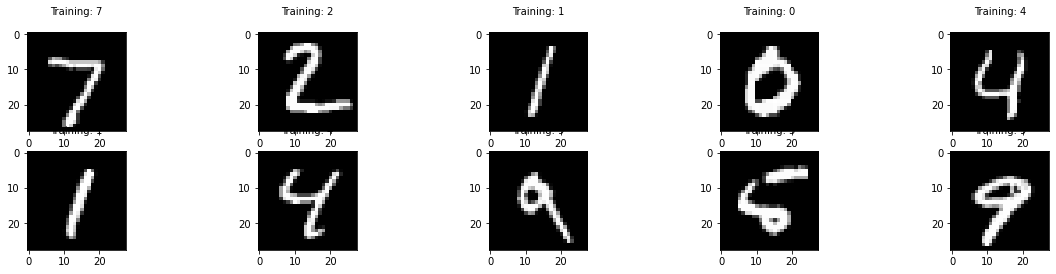

In [ ]:
#Visualise
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(x_test[0:10], classes[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 10)

Text(0.5, 1.0, 'Accuracy = 0.9787999987602234')

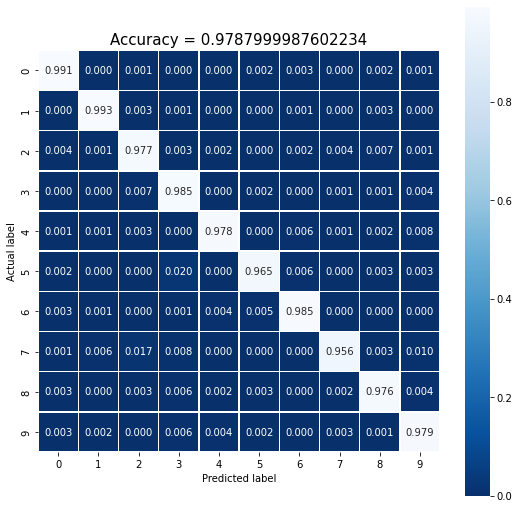

In [ ]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test, classes, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy = {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)

In [ ]:
#Callbacks : A callback performs actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch)
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, CSVLogger
import os, datetime

early_stopping = EarlyStopping(monitor='val_loss', patience=5)  #which quantity to monitor to decide early stopping
#patience = the number of epochs to wait before stopping

#Notice that since we set patience=5, we won’t get the best model, but the model 5 epochs after the best model.
#==> An additional callback is required that saves the best model observed during training. This is the ModelCheckpoint callback

model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tnsrboard = TensorBoard(logdir, histogram_freq=1)

csv_log_path = "/content/logs.csv"
csv_logger = CSVLogger(csv_log_path, append=True, separator=',')

callbacks = [early_stopping, model_checkpoint, tnsrboard, csv_logger]

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.25,
    batch_size=40,
    verbose=2,
    callbacks=[callbacks]
)

In [ ]:
#The saved model can then be loaded and evaluated any time by calling the load_model() method
from keras.models import load_model
saved_model = load_model('best_model.h5')

test_acc = saved_model.evaluate(x_test, y_test)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
'''#Regularizers :
from tensorflow.keras.regularizers import l2, l1
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=l1(l=0.1)))
model.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
'''